In [1]:
# Add anna to the path
import os
import sys
module_path = os.path.abspath(os.path.join('../../../anna'))
if module_path not in sys.path:
    sys.path.append(module_path)

DATA_DIR = "../../../data"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dataset.reuters21578.parser as data
from model.mlp import MLP

%matplotlib inline

In [3]:
# Load data
train_docs, test_docs, unused_docs = data.fetch_and_parse(DATA_DIR)

In [4]:
# Preprocess labels
labels = []
for d in train_docs + test_docs:
    for l in d.labels:
        if l not in labels:
            labels.append(l)

In [5]:
# Create MLP classifier
model = MLP(DATA_DIR, labels, num_layers=2, voc_size=300000, verbose=True)

Building model
Compiling model


In [6]:
# Train
history = model.train(train_docs, test_docs)

Train on 6993 samples, validate on 777 samples
Epoch 1/50
6976/6993 [============================>.] - ETA: 0s - loss: 5.8070
val - acc: 0.2227, hamming: 0.9869, ebf1: 0.2227, mif1: 0.2735, maf1: 0.2971

test - acc: 0.3359, hamming: 0.9888, ebf1: 0.3359, mif1: 0.4002, maf1: 0.0093
6993/6993 [==============================] - 331s - loss: 5.8071 - val_loss: 4.4407
Epoch 2/50
6976/6993 [============================>.] - ETA: 0s - loss: 3.3672
val - acc: 0.3848, hamming: 0.9897, ebf1: 0.3857, mif1: 0.4552, maf1: 0.3084

test - acc: 0.5144, hamming: 0.9918, ebf1: 0.5174, mif1: 0.5831, maf1: 0.0200
6993/6993 [==============================] - 291s - loss: 3.3688 - val_loss: 3.7193
Epoch 3/50
6976/6993 [============================>.] - ETA: 0s - loss: 2.8588
val - acc: 0.4402, hamming: 0.9905, ebf1: 0.4747, mif1: 0.5448, maf1: 0.3315

test - acc: 0.5601, hamming: 0.9923, ebf1: 0.5825, mif1: 0.6372, maf1: 0.0422
6993/6993 [==============================] - 412s - loss: 2.8592 - val_loss: 3.2


test - acc: 0.7572, hamming: 0.9952, ebf1: 0.8242, mif1: 0.8117, maf1: 0.3028
6993/6993 [==============================] - 189s - loss: 0.3826 - val_loss: 2.6194
Epoch 27/50
6976/6993 [============================>.] - ETA: 0s - loss: 0.3806
val - acc: 0.7169, hamming: 0.9941, ebf1: 0.8079, mif1: 0.7861, maf1: 0.5707

test - acc: 0.7546, hamming: 0.9950, ebf1: 0.8318, mif1: 0.8104, maf1: 0.3167
6993/6993 [==============================] - 174s - loss: 0.3812 - val_loss: 2.4713
Epoch 28/50
6976/6993 [============================>.] - ETA: 0s - loss: 0.3602
val - acc: 0.7091, hamming: 0.9942, ebf1: 0.8014, mif1: 0.7869, maf1: 0.5521

test - acc: 0.7496, hamming: 0.9951, ebf1: 0.8236, mif1: 0.8114, maf1: 0.3160
6993/6993 [==============================] - 225s - loss: 0.3594 - val_loss: 2.6178
Epoch 29/50
6976/6993 [============================>.] - ETA: 0s - loss: 0.3502
val - acc: 0.7117, hamming: 0.9940, ebf1: 0.8108, mif1: 0.7863, maf1: 0.5625

test - acc: 0.7552, hamming: 0.9950, eb

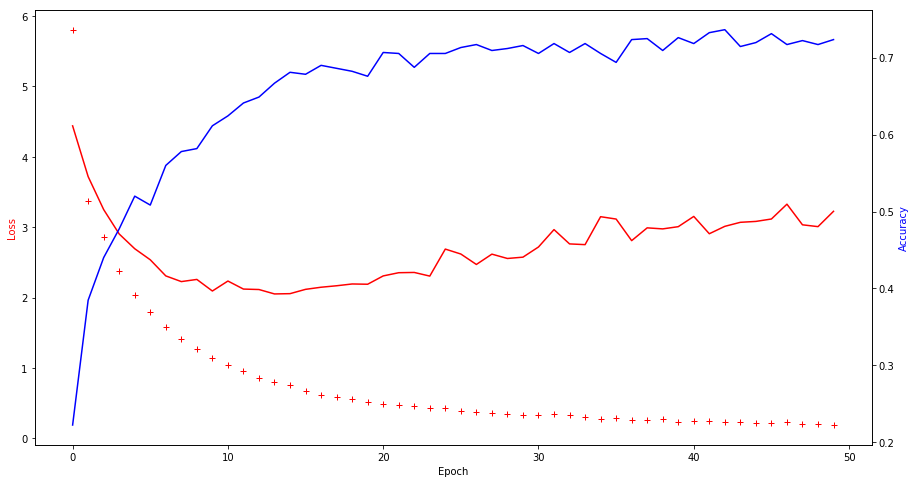

In [7]:
pre, ax = plt.subplots(figsize=[15, 8])

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss", color="r")
ax.plot(range(50), history.history["val_loss"], "r-")
ax.plot(range(50), history.history["loss"], "r+")

ax2 = ax.twinx()
ax2.set_ylabel("Accuracy", color="b")
ax2.plot(range(50), history.history["val_acc"], "b-")